<a href="https://colab.research.google.com/github/ChuLinh02/GraphMining/blob/main/HW01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSC17103 - Colab 1 - Luật lũy thừa**

Đây là Bài tập 01 trong môn học Khai thác Dữ liệu Đồ thị (Graph Mining) - CSC1703 tại Khoa Công nghệ Thông tin, Trường Đại học Khoa học Tự nhiên, Đại học Quốc gia TP.HCM

(Cập nhật lần cuối: 27/05/2024)

Họ tên: Chu Hải Linh

MSSV: 21120496

## **Mục tiêu của bài tập**

## **Cách thực hiện và nộp bài tập**

&#9889; Chú ý, bạn nên thực hiện theo sự hướng dẫn dưới đây. Nếu có bất kỳ điều gì không rõ, bạn cần liên hệ ngay trợ giảng/ giáo viên thực hành để được hỗ trợ kịp thời.

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```
hoặc đối với markdown cell thì là:
```markdown
YOUR ANSWER HERE
```

**Cách nộp bài**

Trước khi nộp bài, bạn chọn `Kernel` - `Restart Kernel & Run All Cells` đối với trường hợp sử dụng môi trường local hoặc `Runtime` - `Restart session and run all` đối với môi trường Google Colab, để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (ví dụ, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - File `HW01.ipynb` (không cần nộp các file khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại với định dạng nén là .zip (chứ không được là .rar hay các định dạng khác) và nộp ở link trên moodle. \
<font color=red>Bạn lưu ý tuân thủ chính xác qui định nộp bài này.</font>

## Setup và Import các thứ

In [1]:
# Upgrade packages
!pip install --upgrade scipy networkx

In [2]:
# Import
import time
import numpy as np # For numerical computation
import networkx as nx # For network/ graph manipulation
import matplotlib.pyplot as plt # For visualization
plt.style.use("fast")

import requests # For download something
from zlib import adler32 # For fun

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
# Make sure something
assert nx.__version__ > '2.5'

## Task 00: Phân phối tích lũy luật lũy thừa (2đ)

Nếu các bạn có một chút quên về [phân phối tích lũy (hay cumulative distribution function, viết tắt là CDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function) thì có thể tự tìm hiểu lại nó.

Mạng scale-free (hay còn gọi là mạng lưới không tỷ lệ, mạng tự do) có một phân phối bậc lũy thừa (Power law degree distribution). Trước khi đi tiếp, nếu các bạn có một chút quên về [hàm mật độ xác suất (hay probability density function, viết tắt là PDF)](https://en.wikipedia.org/wiki/Probability_density_function) thì có thể tự tìm hiểu lại nó. Hàm mật độ xác suất của luật lũy thừa là
$$ p(x) = Cx^{-\alpha},$$
trong đó $C$ là một hằng số chuẩn hóa
$$C = \frac{\alpha - 1}{x_{\text{min}}^{-\alpha + 1}}$$
và $\alpha>1$ được gọi là mũ của phân phối.

In [4]:
def powerLawPDF(x, alpha=3.5, x_min=1):
    C = (alpha - 1) / x_min ** (1 - alpha)
    return C * x ** (-alpha)

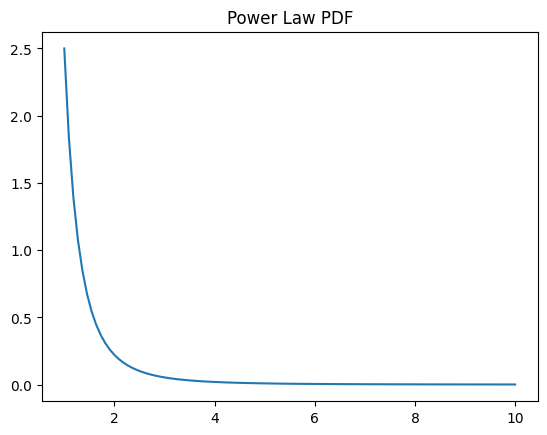

In [5]:
x_space = np.linspace(1, 10, 100)
plt.plot(x_space, powerLawPDF(x_space))
plt.title('Power Law PDF');

Và dựa trên hàm mật độ xác suất của luật lũy thừa, chúng ta có thể phát sinh những quan trắc. Ta thực hiện từng bước như sau:
- Bước 01: rút ra hàm phân phối tích lũy $F(x) = P(X \leq x)$
$$F(x) = 1 - \int_{x}^\infty p(t) dt.$$
lấy tích phân bằng kỹ thuật giải tích

YOUR ANSWER HERE

$$p(t) = Ct^{-\alpha}$$

Thay $p(t)$ vào công thức hàm phân phối tích lũy:

$$ F(x) = 1 - \int_{x}^∞ Ct^{-α} \, dt$$

Tính tích phân của $t^{-\alpha}$
$$\int {t}^{-\alpha} \, dt = \frac{t^{1-\alpha}}{1-\alpha}.$$
Do đó, ta có:
$$F(x) = 1 - C\left[\frac{t^{1-\alpha}}{1-\alpha} \right]_{x}^{∞}$$
Khi $t \to ∞ , t^{1-\alpha} \to 0$ vì $\left(\alpha >1\right)$, do đó:

$$F(x) = 1 - C\left(0 - \frac{x^{1- \alpha}}{1-\alpha} \right)$$

$$=> F(x) = 1 + C\frac{x^{1-\alpha}}{1-\alpha}$$

Thay hằng số chuẩn hóa $C = \frac{\alpha - 1}{x_\text{min}^{-\alpha+1}}$ vào:
$$ F(x) = 1 - \left(\frac{x_\text{min}}{x}\right)^{\alpha -1}$$

- Bước 02: các bạn hoàn thành hàm `powerLawCDF` với tham số `x`, `alpha`, và `x_min`

In [6]:
def powerLawCDF(x, alpha=3.5, x_min=1):
    # YOUR CODE HERE
    return 1 - (x_min / x)**(alpha - 1)

In [7]:
assert adler32(str(powerLawCDF(2, 2, 1)).encode()) == 19136660
assert adler32(str(powerLawCDF(10, 2, 1)).encode()) == 19398808
assert adler32(str(powerLawCDF(2, 3, 1)).encode()) == 32571595

## Task 01: Giả phân phối luật lũy thừa (2đ)

Gọi $X \sim \text{Power law}$, tức là biến ngẫu nhiên $X$ có phân phối luật lũy thừa.

Gọi $R$ là một biến ngẫu nhiên, mà $R = F(X)$. Ta có, $R$ phân phối đồng nhất trên khoảng $[0, 1]$. Nếu các bạn tò mò lý do tại sao? [Xem chứng minh](https://en.wikipedia.org/wiki/Probability_integral_transform#Proof).

Điều này có nghĩa là chúng ta dễ dàng phát sinh các con số giả ngẫu nhiên (pseudorandom) phân phối đồng nhất và sau đó biến đổi chúng về luật lũy thừa. Ok, bây giờ ta cần tìm một biểu thức cho $x = F^{-1}(r)$, trong đó $r$ là một quan sát từ phân phối đồng nhất trên khoảng $[0,1]$.

Bạn cần đưa ra một dạng giải tích của $F^{-1}(r)$ và viết một hàm `powerLawPPF` (hàm phần trăm từng điểm, percent point function, còn được gọi là một phân vị - quantile) với các tham số bao gồm `r`, `alpha` và `x_min`.

YOUR ANSWER HERE

Tính hàm ngược của CDF
Ta có:
$$F(x) = 1 - \left(\frac{x_\text{min}}{x}\right)^{\alpha - 1}$$
Chúng ta muốn tính hàm ngược của $F^{-1}(r)$ cho $r \in [0,1]$:
* Đặt $F(x) = r$:

$$r = 1 - \left(\frac{x_\text{min}}{x}\right)^{\alpha -1}$$

* Giải phương trình cho $x$:

\begin{align*}
r &= 1 - \left(\frac{x_\text{min}}{x}\right)^{\alpha -1} \\
&\Leftrightarrow \left(\frac{x_\text{min}}{x}\right)^{\alpha -1} = 1 - r \\
&\Leftrightarrow \left(\frac{x_\text{min}}{x}\right) = (1-r)^{\frac{1}{\alpha -1}} \\
&\Rightarrow x = x_\text{min}(1-r)^{-\frac{1}{\alpha -1}}
\end{align*}

Vậy kết quả hàm ngược của F là:

$$F^{-1}(r) = x_\text{min}(1-r)^{-\frac{1}{\alpha -1}} $$

In [8]:
def powerLawPPF(r, alpha=3.5, x_min=1):
    # YOUR CODE HERE
    if np.any(r < 0) or np.any(r > 1):
        raise ValueError("r must be in the range [0, 1]")
    return x_min * (1 - r)**(-1 / (alpha - 1))

In [9]:
# Test
assert adler32(str(round(powerLawPPF(0.5, 2, 1), 2)).encode()) == 19202193
assert adler32(str(round(powerLawPPF(0.9, 2, 1), 2)).encode()) == 31719616
assert adler32(str(round(powerLawPPF(0.96, 3, 1), 2)).encode()) == 19792020

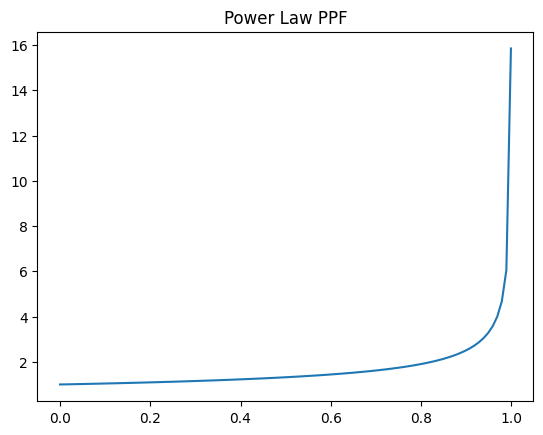

In [10]:
# Visualization
x_space = np.linspace(0, 0.999, 100)
plt.plot(x_space, powerLawPPF(x_space))
plt.title('Power Law PPF');

Và bây giờ, ta có thể phát sinh các quan trắc từ phân phối lũy thừa bằng các bước như sau
- Bước 1: Phát sinh quan trắc từ phân phối đồng nhất trên khoảng $[0, 1]$
- Bước 2: Tính toán giá trị PPF của quan trắc cho trước.

In [11]:
def powerLawGenerate(n, alpha=3.5, x_min=1, random_seed=1):
    np.random.seed(random_seed) # gán seed cho bộ random của numpy
    uni_sample = np.random.uniform(0, 0.999, n) # phát sinh n quan trắc trên khoảng [0, 0.999].
    return powerLawPPF(uni_sample, alpha, x_min)

In [12]:
# Thiết lập một số tham số
alpha = 3.5
x_min = 1
x_train = powerLawGenerate(1000, alpha, x_min)
x_space = np.linspace(1, 15, 100)

Và đây là biểu đồ historgram của mẫu đã được phát sinh.

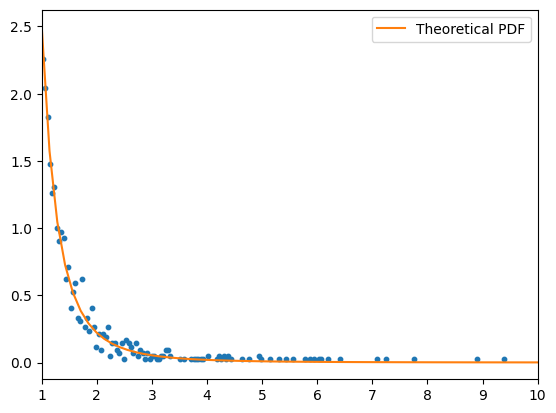

In [13]:
# Visualization
hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=10)
plt.plot(x_space, powerLawPDF(x_space, alpha, x_min),  label='Theoretical PDF', c='tab:orange')
plt.legend()
plt.xlim(1, 10)
plt.show()

Và đây là biểu đồ histogram của mẫu đã được phát sinh và đã được log-log scale.

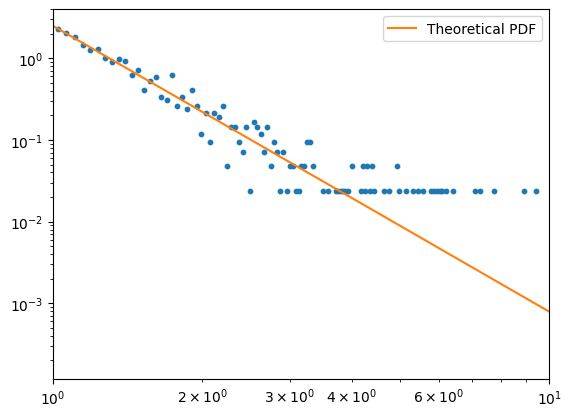

In [14]:
hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)
plt.plot(x_space, powerLawPDF(x_space, alpha, x_min), label='Theoretical PDF', c='tab:orange')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 10)
plt.show()

Bạn có nhận xét gì?

YOUR ANSWER HERE

* **Histogram của mẫu được phát sinh**:
  * Trục x đại diện cho mẫu thử từ phân phối luật lũy thừa,trục y đại diện cho hàm mật độ xác suất (pdf - Probability Density Function)
  * Đường màu cam biểu thị hàm mật độ xác suất tính theo lí thuyết của phân phối lũy thừa, các chấm xanh là các giá trị mẫu từ phân phối tạo ra.
  * Nhìn chung, các điểm dữ liệu màu xanh và đường lý thuyết khá khớp nhau ở phía bên trái (tại các giá trị nhỏ). Ở phía bên phải, khi giá trị tăng lên, có ít điểm dữ liệu hơn do tính chất phân phối của luật lũy thừa với sự giảm dần xác suất xuất hiện các giá trị lớn.
* **Histogram log-log scale**:
  * Trục x và y của biểu đồ đã được biến đổi thành log-log scale để trực quan hóa rõ hơn các giá trị của phân phối lũy thừa.
  * Đường màu cam lý thuyết và các điểm dữ liệu cho thấy một mối quan hệ tuyến tính, đặc trưng của phân phối luật lũy thừa khi biểu diễn trên log-log scale.
  * Trên log-log scale, sự khớp giữa mẫu và lý thuyết tốt hơn ở toàn bộ miền giá trị của x, vì phân phối lũy thừa có dạng đường thẳng trên không gian log-log.



## Task 02: Ước lượng của $\alpha$ với linear binning (2đ)

Cho trước các quan trắc từ phân phối lũy thừa, ta sẽ cố gắng ước lượng $\alpha$. Cách dễ nhất là thử vẽ PDF thực nghiệm với linear binning trong dạng log-log scale (log scale cả hai trục tung-hoành) và sau đó sử dụng linear regression (quá dễ với các bạn đã làm được bài tập đầu tiên của Nhập môn Học máy - Hồi quy tuyến tính, nhưng ở đây không cần các bạn phải implement lại LR).

Nói thêm, linear binning có nghĩa là chúng ta giữ độ rộng của bin cố định.

Trong phần này, các bạn viết và hoàn thành hàm `alphaLRegBins` mà đầu vào của nó gồm một tập huấn luyện, số lượng bin tuyến tính và trả về một ước lượng cho $\alpha$.

Mình nghĩ chắc là sẽ có kiểm định cho $\alpha$ nhưng mà chúng ta chỉ dừng lại việc đưa ra con số thôi. Việc này sẽ để dành cho khóa sau =)))

Gợi ý:
- Lấy log cả hai phía của đẳng thức $p(x) = Cx^{-\alpha}$
- Để tính một PDF thực nghiệm, sử dụng `np.histogram(x_train, bins=bins, density=True)`
- Để tính toán giả nghịch đảo ma trận (pseudoinverse matrix), sử dụng `np.linalg.pinv`
- Sử dụng hồi quy tuyến tính để khớp dữ liệu bằng cách dùng `sklearn.linear.LinearRegression`

In [15]:
def alphaLRegBins(x_train, bins):
    # YOUR CODE HERE
    # log(p(x)) = log(C) - alpha*log(x)
    """
    Args:
      x_train (np.ndarray)
      bins (int): the number of bins
    Returns:
      alpha_estimate (float): the estimated alpha
    """

    hist, bin_edges = np.histogram(x_train, bins=bins, density=True)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) * 0.5

    mask = hist > 0
    hist = hist[mask]
    bin_centers = bin_centers[mask]

    log_bin_centers = np.log(bin_centers).reshape(-1,1)
    log_pdf = np.log(hist).reshape(-1, 1)

    model = LinearRegression()
    model.fit(log_bin_centers, log_pdf)

    alpha_estimate = model.coef_[0][0]
    # print(alpha_estimate)
    return alpha_estimate

In [16]:
# Test
bins = 100
x_train = powerLawGenerate(1000, x_min=1, alpha=2)
assert adler32(str(np.abs(alphaLRegBins(x_train, bins))).encode()) == 586417073
x_train = powerLawGenerate(1000, x_min=1, alpha=3.5)
assert adler32(str(np.abs(alphaLRegBins(x_train, bins))).encode()) == 582943655
x_train = powerLawGenerate(1000, x_min=1, alpha=10)
assert adler32(str(np.abs(alphaLRegBins(x_train, bins))).encode()) == 523371384

Trực quan hóa bằng biểu đồ

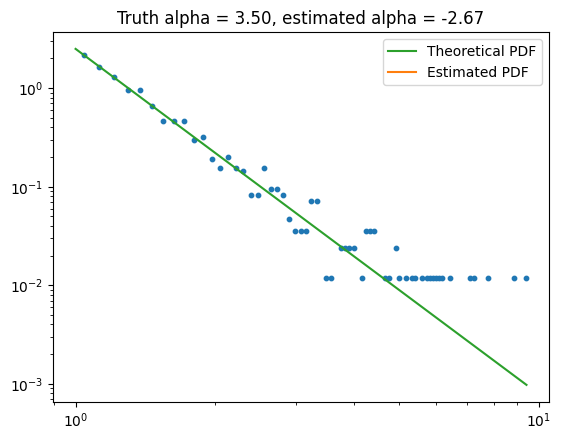

In [17]:
x_min = 1
alpha = 3.5
bins = 100

x_train = powerLawGenerate(1000, alpha, x_min)
hist, bin_edges = np.histogram(x_train, bins=bins, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)

hat_alpha = alphaLRegBins(x_train, bins)
x_space = np.linspace(x_min, x_train.max(), 100)
plt.plot(x_space, powerLawPDF(x_space, alpha, x_min), label='Theoretical PDF', c='tab:green')
plt.plot(x_space, powerLawPDF(x_space, hat_alpha, x_min), label='Estimated PDF', c='tab:orange')
plt.legend()
plt.title('Truth alpha = {:.2f}, estimated alpha = {:.2f}'.format(alpha, hat_alpha))
plt.xscale('log')
plt.yscale('log')
plt.show()

## Task 03: Ước lượng $\alpha$ với logarithmic binning (2đ)

Như chúng ta đã thấy việc ước lượng với linear binning là tương đối chưa chính xác. Với kỹ thuật này, logarithmic binning, chúng ta để kích thước bin tăng theo một giá trị nào đó. Việc này đảm bảo rằng mỗi bin có một số lượng quan trắc tương đương nhau.

Trong phần này, các bạn viết và hoàn thành hàm `alphaLogBins` mà đầu vào của nó gồm một tập huấn luyện, số lượng bin logarith và trả về một ước lượng cho $\alpha$.

In [18]:
def alphaLogBins(x_train, bins):
    # YOUR CODE HERE
    raise NotImplementedError()

In [19]:
# Test
bins = 100
x_train = powerLawGenerate(1000, x_min=1, alpha=2)
assert adler32(str(np.abs(alphaLogBins(x_train, bins))).encode()) == 586744763
# print(np.abs(alphaLogBins(x_train, bins)))
x_train = powerLawGenerate(1000, x_min=1, alpha=3.5)
assert adler32(str(np.abs(alphaLogBins(x_train, bins))).encode()) == 584647596
# print(np.abs(alphaLogBins(x_train, bins)))
x_train = powerLawGenerate(1000, x_min=1, alpha=10)
assert adler32(str(np.abs(alphaLogBins(x_train, bins))).encode()) == 458294066
# print(np.abs(alphaLogBins(x_train, bins)))

NotImplementedError: 

Trực quan hóa bằng biểu đồ

In [ ]:
x_min = 1
alpha = 3.5
bins = 100

x_train = powerLawGenerate(1000, alpha, x_min)
binning = np.logspace(np.log10(x_min), np.log10(x_train.max()), bins)
hist, bin_edges = np.histogram(x_train, bins=binning, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)

hat_alpha = alphaLogBins(x_train, bins)
x_space = np.linspace(x_min, x_train.max(), 100)
plt.plot(x_space, powerLawPDF(x_space, alpha, x_min), label='Theoretical PDF', c='tab:green')
plt.plot(x_space, powerLawPDF(x_space, hat_alpha, x_min), label='Estimated PDF', c='tab:orange')
plt.legend()
plt.title('Truth alpha = {:.2f}, estimated alpha = {:.2f}'.format(alpha, hat_alpha))
plt.xscale('log')
plt.yscale('log')
plt.show()

Quá tuyệt vời :-) giá trị ước lượng alpha của chúng ta đã gần sát với mục tiêu.

## Task 04: Phát sinh đồ thị với phân phối bậc cho trước (2đ)

Chúng ta sẽ thử phát sinh đồ thị với phân phối bậc cho trước.

**Đồ thị A** được mô tả như sau:
- Có 0 đỉnh có bậc 0
- Có 2 đỉnh có bậc 1
- Có 15 đỉnh có bậc 2
- Đồ thị này _liên thông_

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Test
assert adler32(str(dens_a).encode()) == 191496729

In [ ]:
def generateGraphA(dens_a: list) -> nx.Graph:
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Test
G = generateGraphA(dens_a=dens_a)
assert nx.degree_histogram(G) == dens_a
assert nx.is_connected(G)
nx.draw_networkx(G)

**Đồ thị B** được mô tả như sau:
- Có 0 đỉnh có bậc 0
- Có 0 đỉnh có bậc 1
- Có 10 đỉnh có bậc 2
- Đồ thị này _liên thông_

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Test
assert adler32(str(dens_b).encode()) == 190054930

In [ ]:
def generateGraphB(dens_b: list) -> nx.Graph:
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Test
G = generateGraphB(dens_b=dens_b)
assert nx.degree_histogram(G) == dens_b
assert nx.is_connected(G)
nx.draw_networkx(G)